<a href="https://colab.research.google.com/github/berilcankutlu/deep_learning_miuul/blob/main/miuul_face_recognition_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face Recognition Assignment




# Task 1

faces_assignment klasöründe yer alan resimlerin hepsi için age, gender, race ve emotion tespiti yapınız.

- age'i olduğu gibi kullanınız
- gender için dominat_gender'ı kullanınız
- race için dominant race'ı kullanınız
- emotion için dominant_emotion'ı kullanınız


Çıktıda file_name (yani geziyor olduğunuz dizin bilgisi), age, gender, race ve emotion olmalı.

örnek çıktı şu şekilde olmalı:



```
 [{'file_name': '/content/faces_lectures/face18.png',
  'age': 28,
  'gender': 'Man',
  'race': 'white',
  'emotion': 'sad'},
 {'file_name': '/content/faces_lectures/face16.png',
  'age': 45,
  'gender': 'Man',
  'race': 'white',
  'emotion': 'happy'},
 {'file_name': '/content/faces_lectures/face17.png',
  'age': 31,
  'gender': 'Woman',
  'race': 'asian',
  'emotion': 'happy'},
 {'file_name': '/content/faces_lectures/face19.png',
  'age': 22,
  'gender': 'Man',
  'race': 'asian',
  'emotion': 'happy'},
 {'file_name': '/content/faces_lectures/face20.png',
  'age': 26,
  'gender': 'Woman',
  'race': 'asian',
  'emotion': 'neutral'}]
```




  Dikkat edilmesi gerekenler:

  - Tüm işlemleri tek bir fonksiyon yapmalı. fonksiyona sadece root_path yani resimlerin olduğu dizin girilmeli.

  - Amelasyon olmamalı, bunun için path'leri gezecek bir döngü ve oluşturulması gerek ve tüm result'ları tutacak olan results'u gezecek olan bir döngü olmalı.

  - Sonuçlar return edilmeli.

# Task 1 Solution

In [4]:
 pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 69.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 67.3 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=ed418c580bf77a0ae1fe5f94b2d7120ab508fca29190d9cdac82e0244639fa95
  Stored in directory: /root/.cache/pip/wheels/19/39/2f/2d3cadc408a8804103f1c34ddd4b9f6a93497b11fa96fe738e
Successfully built fire


In [3]:
from deepface import DeepFace
import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt


In [19]:
# def analyze_images_in_directory(root_path):
#   images_path = [os.path.join(root_path, f) for f in os.listdir(root_path) if f.endswith(('.jpeg', ".jpg", ".png"))]
#   results = []
#   for path in images_path:
#     results = DeepFace.analyze(path, actions = ["age", "gender", "race", "emotion"])
#     for idx, face in enumerate(results):
#       file_name = path.split("/")[-1]
#       results.append({
#           'file_name': f"path",
#           "age": face["age"],
#           "gender": face["dominant_gender"],
#           "race" : face["dominant_race"],
#           "emotion": face["dominant_emotion"]

#       })
#     return results
# hata veriyor ve dominant olanları getirmiyor

In [25]:
def analyze_images_in_directory(root_path):
    import os
    from deepface import DeepFace

    images_path = [os.path.join(root_path, f) for f in os.listdir(root_path) if f.endswith(('.jpeg', '.jpg', '.png'))]
    result = []

    for path in images_path:
        try:
            results = DeepFace.analyze(path, actions=["age", "gender", "race", "emotion"])

            if not isinstance(results, list):  # Tek yüz durumu
                results = [results]

            for face in results:
                file_name = os.path.basename(path)
                result.append({
                    'file_name': file_name,
                    'age': face.get("age", "Unknown"),
                    'gender': face.get("dominant_gender", "Unknown"),
                    'race': face.get("dominant_race", "Unknown"),
                    'emotion': face.get("dominant_emotion", "Unknown")
                })
        except Exception as e:
            print(f"Error analyzing {path}: {e}")

    return result


In [26]:
path = "/content/drive/MyDrive/Colab Notebooks/face_recognition_files/faces_assignment"
analyze_images_in_directory(path)

Action: emotion: 100%|██████████| 4/4 [00:00<00:00, 44.17it/s]


[{'file_name': 'face1.png',
  'age': 35,
  'gender': 'Woman',
  'race': 'white',
  'emotion': 'fear'},
 {'file_name': 'face2.png',
  'age': 23,
  'gender': 'Woman',
  'race': 'white',
  'emotion': 'happy'},
 {'file_name': 'face5.png',
  'age': 25,
  'gender': 'Man',
  'race': 'middle eastern',
  'emotion': 'happy'},
 {'file_name': 'face4.png',
  'age': 27,
  'gender': 'Man',
  'race': 'white',
  'emotion': 'happy'},
 {'file_name': 'face3.png',
  'age': 30,
  'gender': 'Woman',
  'race': 'white',
  'emotion': 'happy'}]

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Task 2

Önceki bölümdeki fonksiyonun çıktısını tutarak bu çıktıdaki bilgileri resimlerin üzerine yazdırınız.

Önce tek bir görsel için yapınız daha sonra bir dizindeki tüm görseller için yapınız.

Fonksiyonun adı visualize_all_attribute olmalı.

İpucları:

- Fonksiyon iki argumana sahip olmalı: img_path, result

- Adı visualize_all_attribute olmalı.

- Dersteki if else bloğuna gerek yok.

- Sadece title bölümüne odaklanıp bilgiler title'a yansıtmalı. Yani age, gender, race, emotion bilgileri resmin kendisinin üzerine değil uygulamamızdaki gibi olmalı.


# Task 2 Solution



In [36]:
def visualize_all_attribute(img_path, result):
  image = cv2.imread(img_path)
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  font=cv2.FONT_HERSHEY_SIMPLEX
  font_scale = 1.5
  thickness = 2
  color = (255, 255, 255)
  shadow_color = (0,0,0)
  plt.imshow(image_rgb)
  plt.axis('off')
  plt.title(f"Age: {result[0]['age']}, Gender: {result[0]['dominant_gender']}, Race: {result[0]['dominant_race']}, Emotion: {result[0]['dominant_emotion']}")
  plt.show()

Action: emotion: 100%|██████████| 4/4 [00:00<00:00, 46.73it/s]


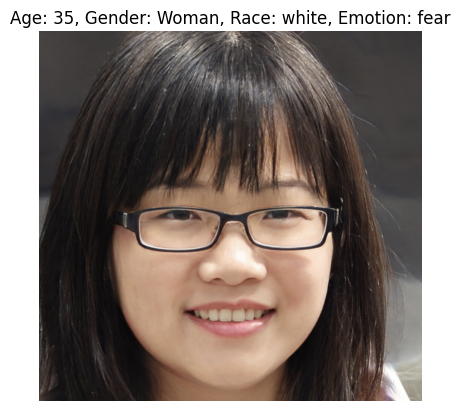

In [38]:
path = "/content/drive/MyDrive/Colab Notebooks/face_recognition_files/faces_assignment/face1.png"
result = DeepFace.analyze(img_path=path, actions=["age", "gender", "race", "emotion"])
visualize_all_attribute(path, result)

In [40]:
root_path = "/content/drive/MyDrive/Colab Notebooks/face_recognition_files/faces_assignment"

In [42]:
image_paths = [os.path.join(root_path,f) for f in os.listdir(root_path) if f.endswith((".jpg", ".jpeg", ".png"))]

Action: emotion: 100%|██████████| 4/4 [00:00<00:00, 34.37it/s]


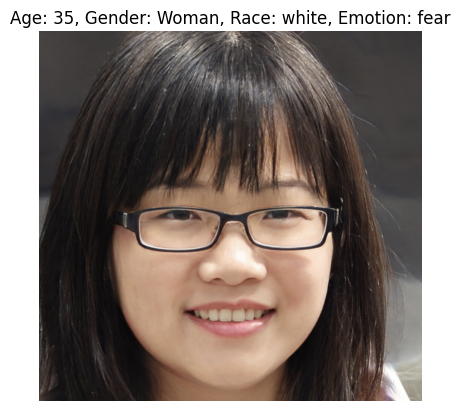

Action: emotion: 100%|██████████| 4/4 [00:00<00:00, 36.96it/s]


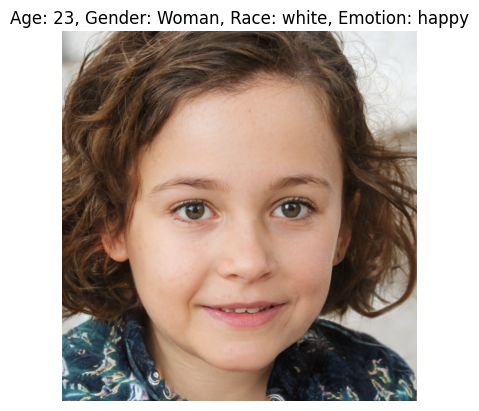

Action: emotion: 100%|██████████| 4/4 [00:00<00:00, 31.03it/s]


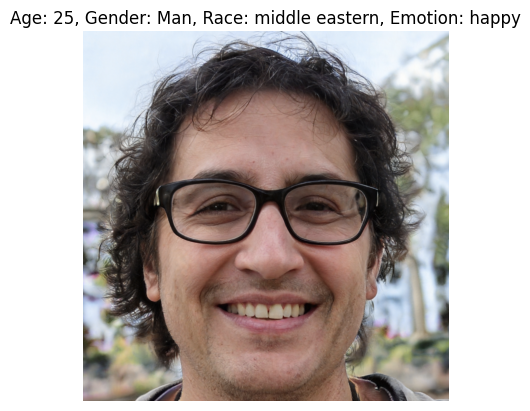

Action: emotion: 100%|██████████| 4/4 [00:00<00:00, 37.14it/s]


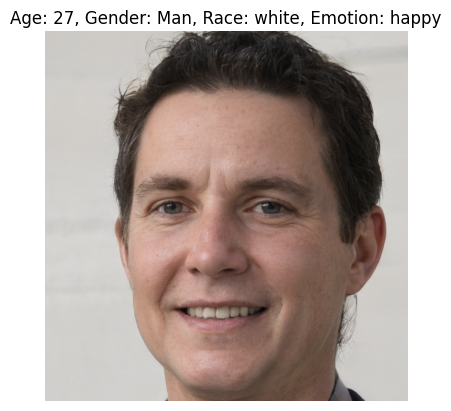

Action: emotion: 100%|██████████| 4/4 [00:00<00:00, 35.24it/s]


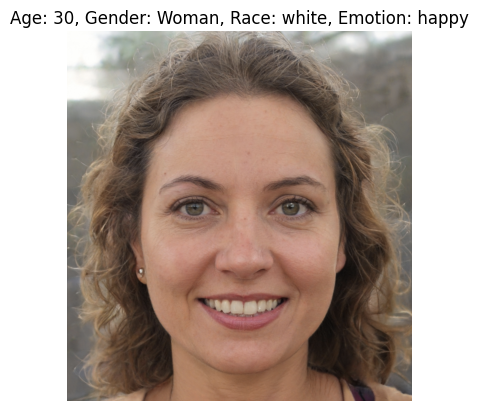

In [44]:
for path in image_paths:
  result = DeepFace.analyze(path, ["age","gender","race","emotion"])
  visualize_all_attribute(path, result)